# <span style='color:red '> CISC 351: Exercise 2 </span>
Leo Toueg
20062982
16lsit


WARNING: The total runtime for this notebook is approx 6 minutes on my laptop,
so sit back, enjoy, maybe get a coffee or watch some youtube. I hope you enjoy.

# <span style='color:blue '> Data Exploration (30 Points) </span>




### Environment and Imports
These are the libraries we will use

In [1297]:
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import train_test_split

### Acquire Data
Read input file into a dataframe

In [1298]:
df = pd.read_csv('Employee_turn_over_data.csv')

### Data Columns
Let's see what attributes we have, and look at the first couple rows:

In [1299]:
print(df.columns.values)
df.head()

['satisfaction score' 'last evaluation' 'number project'
 'average montly hours' 'time spend company' 'work accident' 'left'
 'promotion last 5years' 'job role' 'salary']


,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for Missing Data
It is important to check for any missing or null values. Luckily we have none.

In [1300]:
df.isnull().any()

satisfaction score       False
last evaluation          False
number project           False
average montly hours     False
time spend company       False
work accident            False
left                     False
promotion last 5years    False
job role                 False
salary                   False
dtype: bool

### Attribute Types
We may have to convert some categorical attributes into numerical ones.

In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction score     14999 non-null  float64
 1   last evaluation        14999 non-null  float64
 2   number project         14999 non-null  int64  
 3   average montly hours   14999 non-null  int64  
 4   time spend company     14999 non-null  int64  
 5   work accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion last 5years  14999 non-null  int64  
 8   job role               14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Let's look at the distributions of the two Categorical attributes (Object type), Job Role and Salary:

In [1302]:
df.describe(include=['O'])

,job role,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


As we can see, there are 10 Job Roles and 3 Salary options in the data. We will convert these categorical attributes into numerical ones.

### Prediction Class Distribution
We can see if there is a good balance of turnover (close to 50/50 or not)

In [1303]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

As we can see, we have an imbalanced dataset. We learned two main ways of dealing with this:

1. Assigning a larger weight to wrong predictions from the minority class (special case of Boosting).
2. Upsampling the minority class or downsampling the majority class (stratified sampling).

### Other Attributes Distributions
We can visualise the other attributes' distributions by using binning when the attributes are continuous.

In [1304]:
#Look at the distibutions
df.describe()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Let's look at the distributions of the data to see any possible correlations.

In [1305]:
#Satisfaction Score
fig = px.histogram(df, x="satisfaction score", color="left",width=600, height=400, title='Satisfaction Score')
fig.show()

#Last Evaluation
fig = px.histogram(df, x="last evaluation", color="left",width=600, height=400, title='Last Evaluation')
fig.show()

#Number of Projects
fig = px.histogram(df, x="number project", color="left",width=600, height=400, title='Number of Projects')
fig.show()

#Average Monthly Hours
fig = px.histogram(df, x="average montly hours", color="left",width=600, height=400, title='Average Monthly Hours')
fig.show()

#Time Spent at Company
fig = px.histogram(df, x="time spend company", color="left",width=600, height=400, title='Time Spent at Company')
fig.show()

#Work Accidents
fig = px.histogram(df, x="work accident", color="left",width=600, height=400, title='Work Accidents')
fig.show()

#Promotion last 5 years
fig = px.histogram(df, x="promotion last 5years", color="left",width=600, height=400, title='Promotion in the last 5 years')
fig.show()

#Job Role
fig = px.histogram(df, x="job role", color="left",width=600, height=400, title='Job Role')
fig.show()

#Salary Class
fig = px.histogram(df, x="salary", color="left",width=600, height=400, title='Salary Class')
fig.show()

We can see a lot of information from the plots:

   - Lower salary = higher chance of leaving company
   - Job Role does not seem to impact leaving
   - If promoted in the last 5 years, very improbable that employee leaves
   - Work accident does not seem correlated to leaving
   - After 6 years at a company, very low chance of leaving (max chance of leaving between 3 and 5 years)
   - Higher chance of leaving if you work less than 165 monthly hours or more than 215 monthly hours (maybe Underpaid or Overworked?)
   - Over 50% of employees given the minimum number of projects leave, ALL employees given 7 projects (the max) leave.
   - Employees who report very low satisfaction (<= 0.2) are Extremely likely to leave
   - Employee with last evaluation between 0.6 and 0.8 are very unlikely to leave
   - Average Monthly hours and Number of Projects look very correlated


### Variable Encoding
In order to build good models, we will have to encode some of our categorical attributes, notably
the two categorical attributes Salary and Job Role:

In [1306]:
#Encoding Salary
df['salary'] = df['salary'].map( {'high':2 ,'medium': 1, 'low': 0} ).astype(int)

#Encoding Job Roles
df['job role'] = df['job role'].map( {'sales':9 , 'accounting':8 , 'hr':7, 'technical':6,  'support':5,  'management':4, 'IT':3,  'product_mng':2,  'marketing':1,  'RandD':0} ).astype(float)

df.head()

,satisfaction score,last evaluation,number project,average montly hours,time spend company,work accident,left,promotion last 5years,job role,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


### Correlation Matrix
Let's see if there are any eye-catching negative or positive correlations:

<AxesSubplot:>

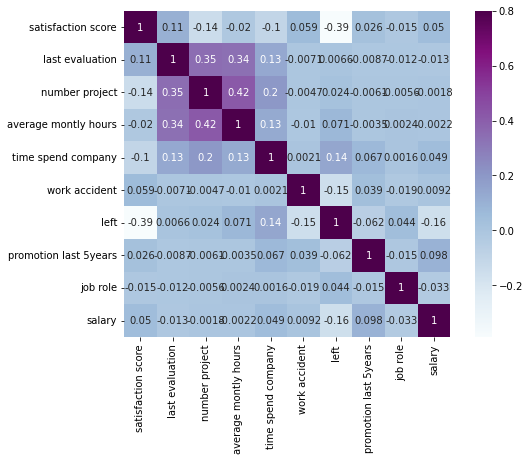

In [1307]:
#Correlation Matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

Some key observations:
    - Leaving is negatively correlated with satisfaction, which makes sense
    - Leaving has a strong correlation with time spent as company. This wasn't apparent at first, but looking back at the previous graph, the proportion of employees leaving goes up every year (longer you work there, more likely you are to leave)
    - Leaving is negatively correlated to Salary so lower salary = more likely to leave
    -We can confirm that Number of Projects and Average monthly hours are very highly correlated.

### Attribute Merge
Since # of Projects and Average monthly hours are very highly correlated, I will try merging them by multiplying the columns.

In [1308]:
#Create New Column by multiplying Project number and average monthly hours
df["proj*hour"] = df['number project'] * df['average montly hours']
df = df.drop(['number project','average montly hours'], axis=1)
df.head()

,satisfaction score,last evaluation,time spend company,work accident,left,promotion last 5years,job role,salary,proj*hour
0,0.38,0.53,3,0,1,0,9.0,0,314
1,0.80,0.86,6,0,1,0,9.0,1,1310
2,0.11,0.88,4,0,1,0,9.0,1,1904
3,0.72,0.87,5,0,1,0,9.0,0,1115
4,0.37,0.52,3,0,1,0,9.0,0,318


# <span style='color:blue '> Bagging (30 Points) </span>
For the Bagging Algorithm, I am going to try using Random Forest with two different
hyperparameter tuning methods.

# Random Forest with Random Hyperparameter Tuning

First implementation:

In [1309]:
y = df['left']
X = df.drop('left', axis=1)
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=1)

#Random Forest
rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers

max_features = ['auto', 'log2']

#Max Depth
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
max_depth.append(None)

#Bootstrap samples
bootstrap = [True, False]

#Hyperparameters
r_grid = {'n_estimators': n_estimators,

          'max_features': max_features,

          'max_depth': max_depth,

          'bootstrap': bootstrap}

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=r_grid, n_iter = 20, scoring='f1', cv = 10, verbose=2, n_jobs=-1)

rfc_random.fit(X_train, y_train);


print(rfc_random.best_params_)
print("Accuracy:")
print(best_random.score(X_test , y_test))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 10, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Accuracy:
0.989


Second implementation using different parameters:

In [1310]:
# Number of trees in random forest
n_estimators = [100,400,600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,30,50,90,100]

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,}
#pprint(random_grid)

#Train Test split
X = df.loc[:, df.columns != "left"].values
y = df.loc[:, df.columns == "left"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


# Pipeline for Random Search Random Forest
pip_rf = make_pipeline(StandardScaler(), RandomForestClassifier())

#Randomsearch Random Forest

rs_rf = RandomizedSearchCV(pip_rf, random_grid, scoring="f1", cv=10, n_jobs=-1)
rs_rf.fit(X_train, y_train)

print(f"\033[1m\033[0mThe best hyperparameters for the data:")
for hyperparam in rs_rf.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", rs_rf.best_params_[hyperparam])

print(f"\033[1m\033[94mBest 10-folds CV f1-score: {rs_rf.best_score_ * 100:.2f}%.")

#Y predicted values
y_pred=rs_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

The best hyperparameters for the data:
n_estimators :  400
max_features :  auto
max_depth :  30
Best 10-folds CV f1-score: 97.92%.
Accuracy: 0.9923333333333333


# Random Forest with Grid Search Hyperparameter Tuning

In [1311]:
#Train Test Split
X = df.loc[:, df.columns != "left"].values
y = df.loc[:, df.columns == "left"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


# Pipeline for Grid Search Random Forest
pip_rf = make_pipeline(StandardScaler(), RandomForestClassifier())

#Hyperparameters that will be tried

hyperparam_grid = {
        "randomforestclassifier__n_estimators": [100, 200],
        "randomforestclassifier__max_features": ["log2","auto"],
        "randomforestclassifier__min_samples_leaf": [1, 3],
        "randomforestclassifier__criterion": ["gini", "entropy"]}

#Gridsearch Random Forest
gs_rf = GridSearchCV(pip_rf, hyperparam_grid, scoring="f1", cv=10, n_jobs=-1)
gs_rf.fit(X_train, y_train)

#Results
print(f"\033[1m\033[0mThe best hyperparameters for the data:")
for hyperparam in gs_rf.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])

print(f"\033[1m\033[94mBest 10-folds CV f1-score: {gs_rf.best_score_ * 100:.2f}%.")
#Y predicted values
y_pred=gs_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

The best hyperparameters for the data:
criterion :  gini
max_features :  log2
min_samples_leaf :  1
n_estimators :  100
Best 10-folds CV f1-score: 97.94%.
Accuracy: 0.9916666666666667


# <span style='color:blue '> Boosting (30 Points) </span>
I am going to use XGBoost with Random search. This is to reduce the bias and variance in a supervised learning technique,
in our case the classification problem of employee turnover.

In [1312]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

#hyperparameters
hyper=dict()
hyper["booster"]=["gbtree","dart;gbtree"]
hyper["eta"]=[0.1,0.3]
hyper["max_depth"]=[2,4]

#Random Search
rgsr = RandomizedSearchCV(xgb, hyper, n_iter=10, scoring='f1', n_jobs=-1, cv=10)

rs_rf=rgsr.fit(X,y)

#Results
print(f"\033[1m\033[0mThe best hyperparameters for the data:")
for hyperparam in rs_rf.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", rs_rf.best_params_[hyperparam])

print(f"\033[1m\033[94mBest 10-folds CV f1-score: {rs_rf.best_score_ * 100:.2f}%.")
#Y predicted values
y_pred=rs_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[23:40:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best hyperparameters for the data:
ax_depth :  4
ta :  0.3
ooster :  gbtree
Best 10-folds CV f1-score: 95.81%.
Accuracy: 0.9866666666666667


# <span style='color:blue '> Summary (10 Points) </span>

In the Bagging and Boosting Sections, I made a total of four models.

Model 1: Random Forest Random Hyperparameter Search
    - Accuracy: 0.989

Model 2: Random Forest Random Hyperparameter Search
    - Accuracy: 0.992
    - F-Score: 0.9791

Model 3: Random Forest Grid Hyperparameter Search
    - Accuracy: 0.992
    - F-Score: 0.9792

Model 4: XGBoost Classifier
    - Accuracy: 0.98668
    - F-Score: 95.81%

## In conclusion, the best preforming model was Model 2, which used the following hyperparameters:
n_estimators :  600
max_features :  auto
max_depth :  100
